In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [5]:
data = data.drop(['Postal Code','Country'],axis=1)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


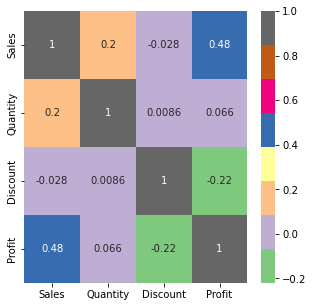

In [7]:
plt.figure(figsize=(5,5))
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='Accent')
plt.show()

From this one can infer that:-
1. Sales is highly positively corelated with Profit than Quantity and has no coorelation with Discount.
2. Quantity has some positive corelation with Sales and has no corelation with Profit and Discount.
3. Discount has negative corelation with Profit and has no corelation with Sales and Quantity.

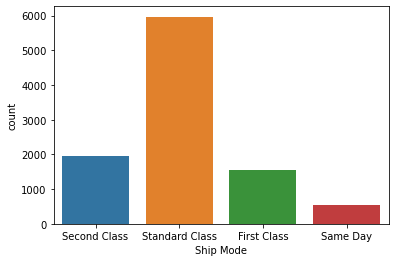

In [8]:
sns.countplot(x=data['Ship Mode'])
plt.show()

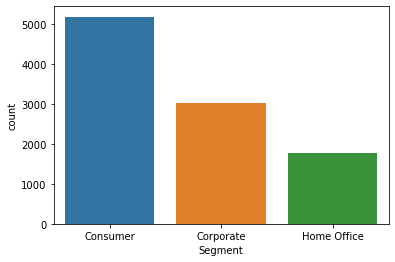

In [9]:
sns.countplot(x=data['Segment'])
plt.show()

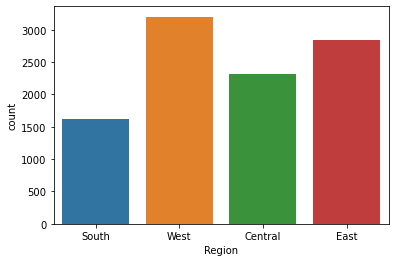

In [10]:
sns.countplot(x=data['Region'])
plt.show()

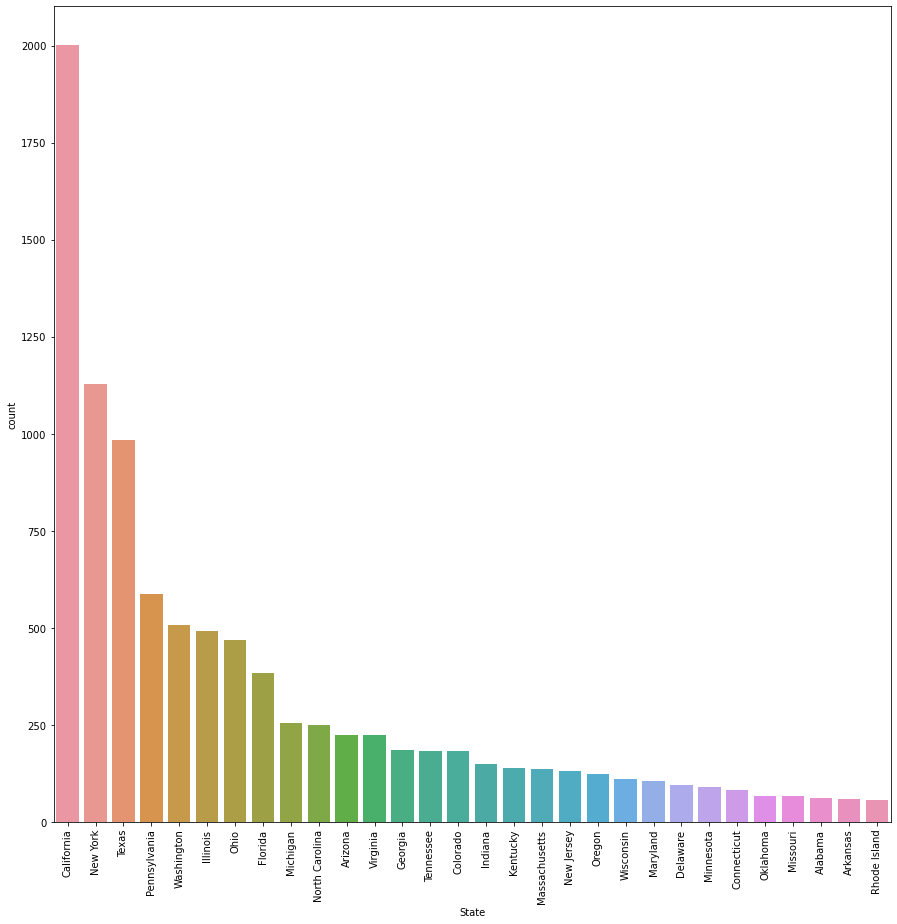

In [11]:
plt.figure(figsize=(15,15))
sns.countplot(x=data['State'],order=(data['State'].value_counts().head(30)).index)
plt.xticks(rotation=90)
plt.show()

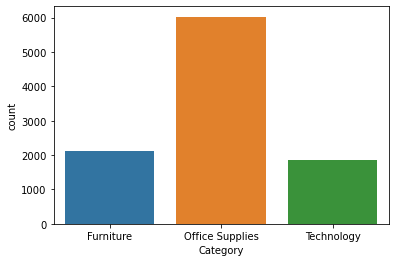

In [12]:
sns.countplot(x=data['Category'])
plt.show()

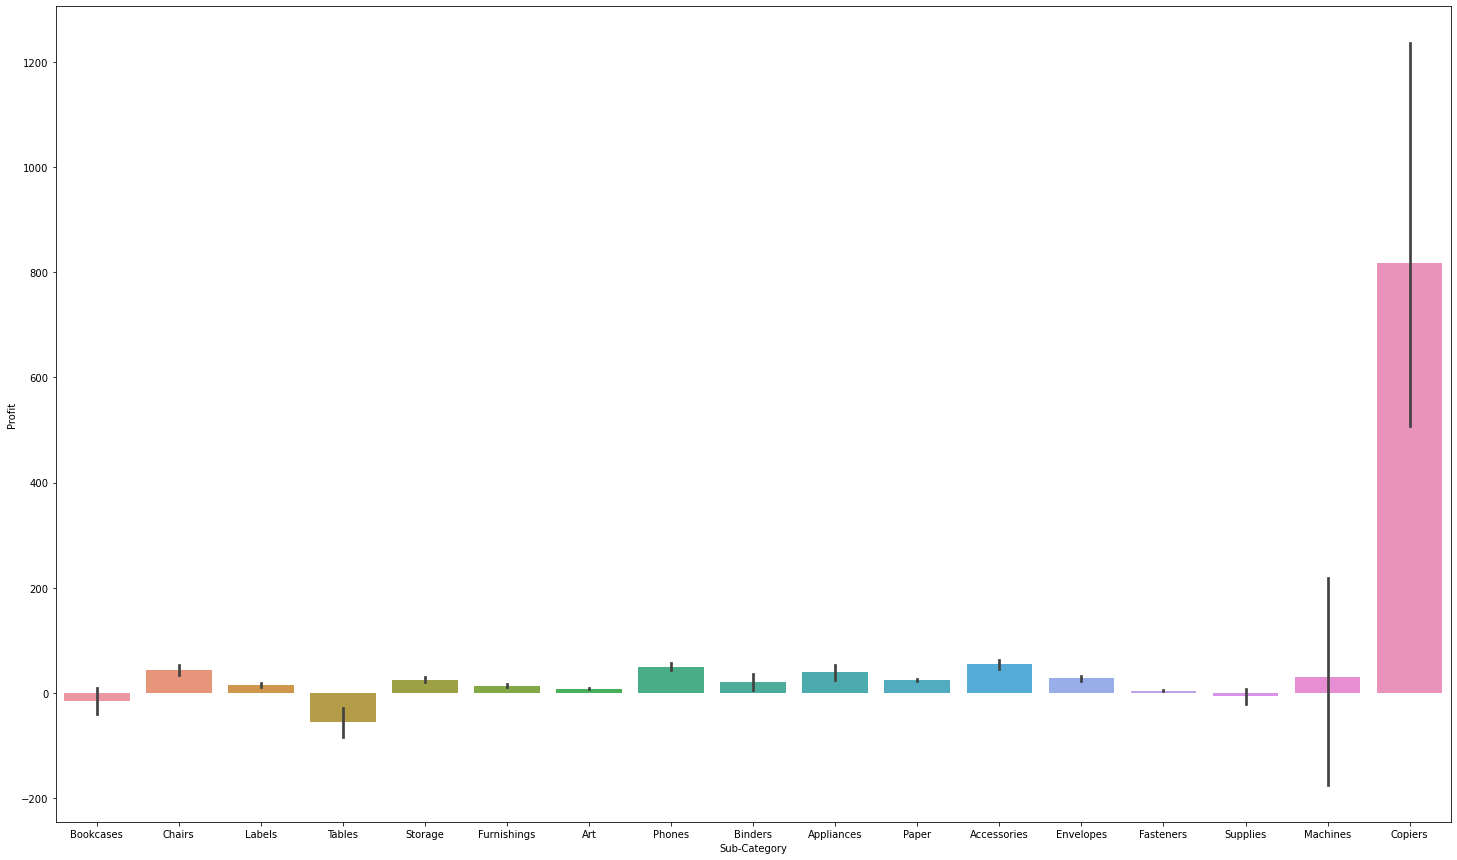

In [13]:
plt.figure(figsize=(25,15))
sns.barplot(x=data['Sub-Category'],y=data['Profit'])
plt.show()

Here, you can see that the company is suffering losses in two items that is bookcases and tables.
The profit earned by the company due to copier is more but the no of sales in copier is very less, so the company needs to increase the number of sales of copier.

<Figure size 1080x1080 with 0 Axes>

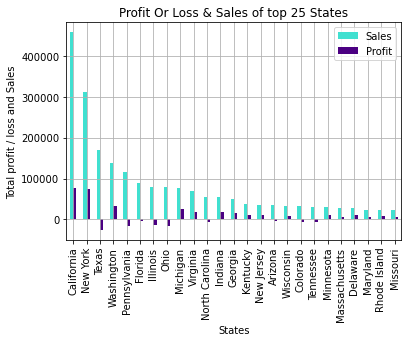

In [17]:
state = data.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False)
plt.figure(figsize=(15,15))
state[:25].plot(kind='bar',color=['#40e0d0','#4b0082'])
plt.title("Profit Or Loss & Sales of top 25 States")
plt.xlabel("States")
plt.ylabel("Total profit / loss and Sales")
plt.grid(True)
plt.show()

<Figure size 1080x1080 with 0 Axes>

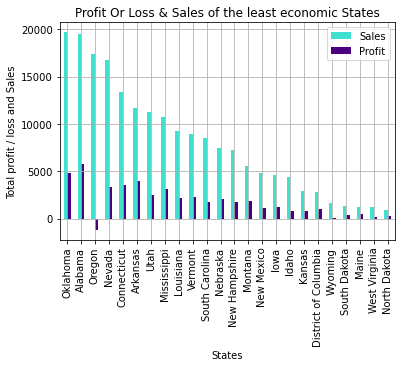

In [18]:
plt.figure(figsize=(15,15))
state[25:].plot(kind='bar',color=['#40e0d0','#4b0082'])
plt.title("Profit Or Loss & Sales of the least economic States")
plt.xlabel("States")
plt.ylabel("Total profit / loss and Sales")
plt.grid(True)
plt.show()

C:\Users\Shaina Mehta\AppData\Local\Temp\ipykernel_16312\2920802857.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Sub-Category')['Profit','Sales'].sum().plot(kind='bar',color=['#ffb5e4','#ff04a3'])


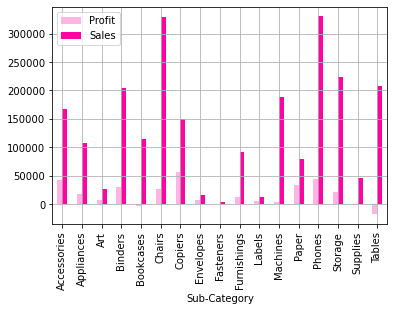

In [21]:
data.groupby('Sub-Category')['Profit','Sales'].sum().plot(kind='bar',color=['#ffb5e4','#ff04a3'])
plt.grid(True)
plt.show()

In [23]:
pd.DataFrame(data.groupby('State').sum())['Profit'].sort_values(ascending=True)

State
Texas                  -25729.3563
Ohio                   -16971.3766
Pennsylvania           -15559.9603
Illinois               -12607.8870
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1190.4705
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

In [24]:
pd.DataFrame(data.groupby("State").sum())['Discount'].sort_values(ascending=True)

State
Alabama                   0.00
Missouri                  0.00
Maine                     0.00
Louisiana                 0.00
Kentucky                  0.00
Kansas                    0.00
Iowa                      0.00
Indiana                   0.00
Wisconsin                 0.00
Mississippi               0.00
Nebraska                  0.00
North Dakota              0.00
District of Columbia      0.00
Oklahoma                  0.00
South Carolina            0.00
South Dakota              0.00
Vermont                   0.00
Arkansas                  0.00
Virginia                  0.00
Georgia                   0.00
Minnesota                 0.00
Wyoming                   0.20
West Virginia             0.30
New Hampshire             0.30
Maryland                  0.60
Connecticut               0.60
New Jersey                0.60
Delaware                  0.60
Montana                   1.00
Rhode Island              1.20
Idaho                     1.80
Michigan                  1.80
Ma

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


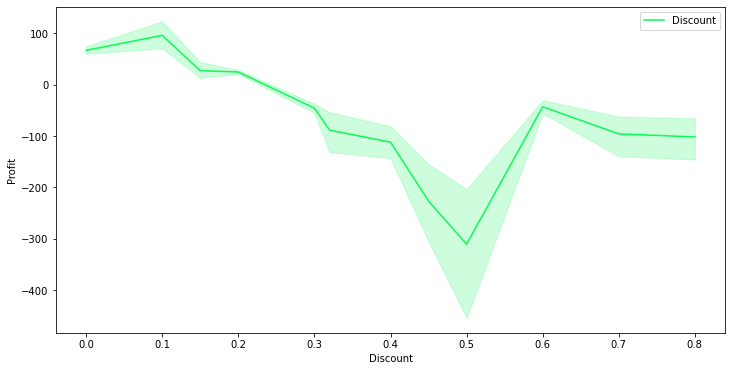

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot('Discount','Profit',data=data,color='#0df957',label='Discount')
plt.legend()
plt.show()

From the above study, when the profit of a state are compared with the discount provided in each state, the states which allowed more discount, went in loss and the above graph we conclude that, "THE PROFIT DECREASES WITH THE INCREASE IN DISCOUNT".
Insights derived from the above EDA:-
1. Office Supplies are good. We have to work more on Technology and Furniture Category of business.
2. Company is facing losses in these two products that are sales of bookcases and tables which are negative in both cases.
3. Company have a lots of profit in the sale of copier but the number of sales is very less so there is a need of increase in number of sales of copier.
4. The company facing loss in top 25 states is in compare to the least economic states.
5. When the profits of a state are compared with the discount provided in each state, the states which has allowed more discount, went into loss.
6. Profit and discount show very weak and negative relationship. This should be kept in mind that before taking any other decision related to business.

In [33]:
l1 = list(set(data['Ship Mode']))
l2 = list(set(data['Segment']))
l3 = list(set(data['City']))
l4 = list(set(data['State']))
l5 = list(set(data['Region']))
l6 = list(set(data['Category']))
l7 = list(set(data['Sub-Category']))
ffValues = {'Ship Mode':l1,
            'Segment':l2,
            'City':l3,
            'State':l4,
            'Region':l5,
            'Category':l6,
            'Sub-Category':l7}
for k,v in ffValues.items():
    print(str(k)+":",v)
    print()

Ship Mode: ['First Class', 'Standard Class', 'Same Day', 'Second Class']

Segment: ['Consumer', 'Corporate', 'Home Office']

City: ['Noblesville', 'Lubbock', 'Caldwell', 'Asheville', 'Watertown', 'Seattle', 'Santa Maria', 'Fort Collins', 'Franklin', 'Riverside', 'Grove City', 'West Jordan', 'Phoenix', 'Provo', 'Des Plaines', 'Sandy Springs', 'Royal Oak', 'Troy', 'Coon Rapids', 'San Diego', 'Manchester', 'San Gabriel', 'Norfolk', 'Auburn', 'Ontario', 'Atlanta', 'Olathe', 'Antioch', 'Pasco', 'Knoxville', 'Rome', 'Pasadena', 'North Charleston', 'Yonkers', 'Saint Petersburg', 'Manteca', 'Pomona', 'Hoover', 'Evanston', 'Portland', 'Atlantic City', 'Redwood City', 'Grapevine', 'Bullhead City', 'Eau Claire', 'Salinas', 'Frankfort', 'Smyrna', 'Roseville', 'Murfreesboro', 'Las Cruces', 'Portage', 'Morgan Hill', 'Lodi', 'Great Falls', 'Wichita', 'Waco', 'Rochester', 'Laguna Niguel', 'Hattiesburg', 'Passaic', 'Warner Robins', 'Long Beach', 'Sanford', 'Santa Fe', 'Des Moines', 'Twin Falls', 'Chatt

In [34]:
for k,v in ffValues.items():
    data[k].replace(v,np.arange(len(v)),inplace=True)
data.head()

0    15
1    16
2     5
3    14
4    12
Name: Sub-Category, dtype: int32